In [1]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import math
import numpy as np
from scipy.stats import norm
from scipy import stats

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
#from google.colab import drive
#drive.mount('/IMDB_data_NoDup.csv')

In [4]:
IMDB_data_NoDup = "C:\\Users\\vishd\\Desktop\\reetu\\Springboard course\\Data wrangling IMDB dataset\\IMDB_data_NoDup.csv"

#IMDB_data_NoDup = "/content/IMDB_data_NoDup.csv"
#IMDB_data_NoDup = pd.read_csv(IMDB_data_NoDup, sep='\t')
IMDB_data_NoDup = pd.read_csv(IMDB_data_NoDup, sep='\t', nrows = 5000)#, delimiter=',', header=None, skiprows=1)#, names=['LABEL','F1','F2','F3','F4','F5','X','Y','Z','C1','C2'])                                                # loading first files
IMDB_data_NoDup.head()


,Index,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,Num_of_Votes,primaryName_Director,birthYear_Director,deathYear,primaryProfession_director,Dir_knownForTitles
0,0,tt0000019,The Clown Barber,GB,short,1898.0,"Comedy,Short",nm0932055,\N,5.3,19.0,James Williamson,1855.0,1933.0,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763"
1,2,tt0271697,Our New Errand Boy,GB,short,1905.0,"Comedy,Short",nm0932055,\N,5.4,98.0,James Williamson,1855.0,1933.0,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763"
2,5,tt0274177,Two Naughty Boys Teasing the Cobbler,GB,short,1898.0,"Comedy,Short",nm0932055,nm0932055,4.4,7.0,James Williamson,1855.0,1933.0,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763"
3,14,tt0308848,Saved by a Dream,GB,short,1909.0,"Drama,Short",nm0932055,\N,6.3,6.0,James Williamson,1855.0,1933.0,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763"
4,30,tt0454320,£100 Reward,GB,short,1908.0,"Drama,Short",nm0932055,\N,5.3,12.0,James Williamson,1855.0,1933.0,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763"


In [5]:
IMDB_data_NoDup = IMDB_data_NoDup.drop(['Index'], axis = 1)                                             #dropping index column


In [6]:
IMDB_data_NoDup.describe()

,startYear,AveRating,Num_of_Votes
count,5000.000000,5000.000000,5000.000000
mean,1926.331600,5.806900,29.539600
std,18.794496,1.241449,45.563438
min,1894.000000,1.000000,5.000000
25%,1912.000000,5.000000,8.000000
50%,1926.000000,5.800000,13.000000
75%,1937.000000,6.600000,31.000000
max,2017.000000,10.000000,590.000000


In [7]:
IMDB_data_NoDup['startYear'] = pd.to_numeric(IMDB_data_NoDup['startYear'], errors='coerce')
IMDB_data_NoDup['startYear'] = IMDB_data_NoDup["startYear"].convert_dtypes() 

IMDB_data_NoDup['startYear'].unique()

<IntegerArray>
[1898, 1905, 1909, 1908, 1906, 1900, 1901, 1897, 1895, 1896, 1894, 1903, 1899,
 1907, 1910, 1904, 1902, 1913, 1911, 1915, 1912, 1920, 1914, 1923, 1921, 1919,
 1922, 1936, 1916, 1917, 1926, 1932, 1933, 1928, 1927, 1929, 1931, 1935, 1930,
 1918, 1946, 1937, 1938, 1925, 1942, 1944, 1934, 1939, 1924, 2017, 1956, 1945,
 1950, 1940, 1943, 1953, 1954, 1957, 1959, 1960, 1968, 1962, 1964, 1965, 1967,
 1961, 1963, 1969, 1970, 1972, 1966, 1941, 1952, 1955, 1958, 1947, 1948, 1949,
 1951, 2011, 1974, 1973, 2004, 1999, 1971, 1975, 2014, 1977, 1978, 1981, 1982,
 1984, 2005]
Length: 93, dtype: Int64

In [8]:
IMDB_data_NoDup['deathYear'] = pd.to_numeric(IMDB_data_NoDup["deathYear"], errors='coerce')
IMDB_data_NoDup['deathYear'] = IMDB_data_NoDup["deathYear" ].convert_dtypes() 

In [9]:
IMDB_data_NoDup['birthYear_Director'] = pd.to_numeric(IMDB_data_NoDup["birthYear_Director"], errors='coerce')
IMDB_data_NoDup['birthYear_Director'] = IMDB_data_NoDup["birthYear_Director"].convert_dtypes() 


In [10]:
IMDB_data_NoDup.head()

,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,Num_of_Votes,primaryName_Director,birthYear_Director,deathYear,primaryProfession_director,Dir_knownForTitles
0,tt0000019,The Clown Barber,GB,short,1898,"Comedy,Short",nm0932055,\N,5.3,19.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763"
1,tt0271697,Our New Errand Boy,GB,short,1905,"Comedy,Short",nm0932055,\N,5.4,98.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763"
2,tt0274177,Two Naughty Boys Teasing the Cobbler,GB,short,1898,"Comedy,Short",nm0932055,nm0932055,4.4,7.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763"
3,tt0308848,Saved by a Dream,GB,short,1909,"Drama,Short",nm0932055,\N,6.3,6.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763"
4,tt0454320,£100 Reward,GB,short,1908,"Drama,Short",nm0932055,\N,5.3,12.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763"


In [11]:
IMDB_data_NoDup['startYear'].dtype

Int64Dtype()

In [12]:
IMDB_data_NoDup['Age_of_movie'] = 2021 - IMDB_data_NoDup['startYear'] 

In [13]:
IMDB_data_NoDup.head()

,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,Num_of_Votes,primaryName_Director,birthYear_Director,deathYear,primaryProfession_director,Dir_knownForTitles,Age_of_movie
0,tt0000019,The Clown Barber,GB,short,1898,"Comedy,Short",nm0932055,\N,5.3,19.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",123
1,tt0271697,Our New Errand Boy,GB,short,1905,"Comedy,Short",nm0932055,\N,5.4,98.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",116
2,tt0274177,Two Naughty Boys Teasing the Cobbler,GB,short,1898,"Comedy,Short",nm0932055,nm0932055,4.4,7.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",123
3,tt0308848,Saved by a Dream,GB,short,1909,"Drama,Short",nm0932055,\N,6.3,6.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",112
4,tt0454320,£100 Reward,GB,short,1908,"Drama,Short",nm0932055,\N,5.3,12.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",113


In [14]:
IMDB_data_NoDup['Age_of_movie'].unique() 

<IntegerArray>
[123, 116, 112, 113, 115, 121, 120, 124, 126, 125, 127, 118, 122, 114, 111,
 117, 119, 108, 110, 106, 109, 101, 107,  98, 100, 102,  99,  85, 105, 104,
  95,  89,  88,  93,  94,  92,  90,  86,  91, 103,  75,  84,  83,  96,  79,
  77,  87,  82,  97,   4,  65,  76,  71,  81,  78,  68,  67,  64,  62,  61,
  53,  59,  57,  56,  54,  60,  58,  52,  51,  49,  55,  80,  69,  66,  63,
  74,  73,  72,  70,  10,  47,  48,  17,  22,  50,  46,   7,  44,  43,  40,
  39,  37,  16]
Length: 93, dtype: Int64

In [15]:
IMDB_data_NoDup['birthYear_Director'].unique()


<IntegerArray>
[1855, 1854, 1847, 1861, <NA>, 1860, 1873, 1872, 1869, 1874, 1875, 1870, 1864,
 1859, 1851, 1862, 1884, 1880, 1871, 1877, 1868, 1858, 1852, 1867, 1886, 1879,
 1876, 1863, 1885, 1881, 1853, 1878, 1883, 1865, 1882, 1888, 1887, 1857, 1891,
 1894, 1893, 1866, 1890, 1889, 1856, 1892, 1898, 1895, 1899, 1896, 1897, 1901,
 1902, 1900, 1903, 1904, 1908, 1906, 1910, 1905, 1907, 1909, 1911, 1922]
Length: 64, dtype: Int64

In [16]:
IMDB_data_NoDup['Director_age'] = IMDB_data_NoDup['deathYear']  - IMDB_data_NoDup['birthYear_Director'] 
IMDB_data_NoDup.head()

,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,Num_of_Votes,primaryName_Director,birthYear_Director,deathYear,primaryProfession_director,Dir_knownForTitles,Age_of_movie,Director_age
0,tt0000019,The Clown Barber,GB,short,1898,"Comedy,Short",nm0932055,\N,5.3,19.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",123,78
1,tt0271697,Our New Errand Boy,GB,short,1905,"Comedy,Short",nm0932055,\N,5.4,98.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",116,78
2,tt0274177,Two Naughty Boys Teasing the Cobbler,GB,short,1898,"Comedy,Short",nm0932055,nm0932055,4.4,7.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",123,78
3,tt0308848,Saved by a Dream,GB,short,1909,"Drama,Short",nm0932055,\N,6.3,6.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",112,78
4,tt0454320,£100 Reward,GB,short,1908,"Drama,Short",nm0932055,\N,5.3,12.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",113,78


In [17]:
std_Of_AvRating = np.std(IMDB_data_NoDup['AveRating'])
std_Of_AvRating

1.2413244499324103

In [18]:
np.max(IMDB_data_NoDup['AveRating'])

10.0

In [19]:
np.min(IMDB_data_NoDup['AveRating'])

1.0

In [20]:
mean_mu = np.mean(IMDB_data_NoDup['AveRating'])

In [21]:

std_Of_AvRat_sig = np.std(IMDB_data_NoDup['AveRating'])
std_Of_AvRat_sig


stats.norm.interval(0.95, loc=mean_mu, scale= std_Of_AvRat_sig)




(3.3739487850034804, 8.239851214996516)

In [22]:
#IMDB_data_NoDup['startYear'] = IMDB_data_NoDup['startYear'].astype(str).replace('\.0', '', regex=True)
#IMDB_data_NoDup['startYear'] = IMDB_data_NoDup['startYear'].astype(str).replace('\N', '', regex=True)

In [23]:
IMDB_data_NoDup['Age_of_movie'].isna().sum()


0

In [24]:
IMDB_data_NoDup['Age_of_movie'] = IMDB_data_NoDup['Age_of_movie'].astype('float')

In [25]:
IMDB_data_NoDup['Age_of_movie'].fillna((IMDB_data_NoDup['Age_of_movie'].mean()), inplace=True)

In [26]:
IMDB_data_NoDup['Age_of_movie'].value_counts()

109.0    170
124.0    166
91.0     153
108.0    136
123.0    135
        ... 
22.0       1
17.0       1
46.0       1
37.0       1
10.0       1
Name: Age_of_movie, Length: 93, dtype: int64

In [27]:
import numpy as np
#for (columnName, columnData) in IMDB_data_NoDup.iteritems():
    #print()
    #print(columnData['Age_of_movie'])
    #if columnName == 'Age_of_movie':
#age = IMDB_data_NoDup['Age_of_movie']
#age.unique()



conditions = [
    # (IMDB_data_NoDup['Age_of_movie'].ndim == 0),
     (IMDB_data_NoDup['Age_of_movie'] <= 1),
     (IMDB_data_NoDup['Age_of_movie'] > 1) & (IMDB_data_NoDup['Age_of_movie'] <= 10), 
     (IMDB_data_NoDup['Age_of_movie'] > 10) & (IMDB_data_NoDup[ 'Age_of_movie'] <= 25),
     (IMDB_data_NoDup['Age_of_movie'] > 25) & (IMDB_data_NoDup['Age_of_movie'] <= 50),
     (IMDB_data_NoDup['Age_of_movie'] > 50) & (IMDB_data_NoDup['Age_of_movie'] <= 75),
     (IMDB_data_NoDup['Age_of_movie'] > 75) & (IMDB_data_NoDup['Age_of_movie'] <= 100),
     (IMDB_data_NoDup['Age_of_movie'] > 100) & (IMDB_data_NoDup['Age_of_movie'] <= 125),
     (IMDB_data_NoDup['Age_of_movie'] > 125) & (IMDB_data_NoDup['Age_of_movie']<= 150),
     (IMDB_data_NoDup['Age_of_movie'] > 150)]

# create a list of the values we want to assign for each condition
values = ['D0','D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8']

IMDB_data_NoDup['Decade']  = np.select(conditions, values) 

IMDB_data_NoDup.head()
    

,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,Num_of_Votes,primaryName_Director,birthYear_Director,deathYear,primaryProfession_director,Dir_knownForTitles,Age_of_movie,Director_age,Decade
0,tt0000019,The Clown Barber,GB,short,1898,"Comedy,Short",nm0932055,\N,5.3,19.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",123.0,78,D6
1,tt0271697,Our New Errand Boy,GB,short,1905,"Comedy,Short",nm0932055,\N,5.4,98.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",116.0,78,D6
2,tt0274177,Two Naughty Boys Teasing the Cobbler,GB,short,1898,"Comedy,Short",nm0932055,nm0932055,4.4,7.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",123.0,78,D6
3,tt0308848,Saved by a Dream,GB,short,1909,"Drama,Short",nm0932055,\N,6.3,6.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",112.0,78,D6
4,tt0454320,£100 Reward,GB,short,1908,"Drama,Short",nm0932055,\N,5.3,12.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",113.0,78,D6


In [28]:
IMDB_data_NoDup.shape

(5000, 18)

In [29]:
IMDB_data_NoDup['Decade'].value_counts()

D5    2200
D6    1962
D4     753
D7      55
D3      21
D1       6
D2       3
Name: Decade, dtype: int64

In [30]:
IMDB_data_NoDup[IMDB_data_NoDup['Decade'] == '0']

,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,Num_of_Votes,primaryName_Director,birthYear_Director,deathYear,primaryProfession_director,Dir_knownForTitles,Age_of_movie,Director_age,Decade


In [31]:
#IMDB_data_NoDup['Genre','TitleType2'] = IMDB_data_NoDup.genres.str.split(",", expand=True)
#df[['First','Last']] = df.Name.str.split("_",expand=True)
#IMDB_data_NoDup['First','Last'] = IMDB_data_NoDup.genres.apply(lambda x: pd.Series(str(x).split(",")))
#IMDB_data_NoDup.head()

In [32]:
IMDB_data_NoDup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   titleId                     5000 non-null   object 
 1   title                       5000 non-null   object 
 2   region                      5000 non-null   object 
 3   titleType                   5000 non-null   object 
 4   startYear                   5000 non-null   Int64  
 5   genres                      5000 non-null   object 
 6   directors                   5000 non-null   object 
 7   writers                     5000 non-null   object 
 8   AveRating                   5000 non-null   float64
 9   Num_of_Votes                5000 non-null   float64
 10  primaryName_Director        5000 non-null   object 
 11  birthYear_Director          4910 non-null   Int64  
 12  deathYear                   4901 non-null   Int64  
 13  primaryProfession_director  5000 

In [33]:
#IMDB_data_NoDup[IMDB_data_NoDup['birthYear_Director']]

In [34]:
#IMDB_data_NoDup_cat = IMDB_data_NoDup.select_dtypes(include = 'object').copy()
#IMDB_data_NoDup_cat.head(2)

In [35]:
print(IMDB_data_NoDup.isnull().values.sum())

299


In [36]:
print(IMDB_data_NoDup.isnull().sum())

titleId                         0
title                           0
region                          0
titleType                       0
startYear                       0
genres                          0
directors                       0
writers                         0
AveRating                       0
Num_of_Votes                    0
primaryName_Director            0
birthYear_Director             90
deathYear                      99
primaryProfession_director      0
Dir_knownForTitles              0
Age_of_movie                    0
Director_age                  110
Decade                          0
dtype: int64


 IMDB_data_NoDup.fillna(IMDB_data_NoDup['primaryProfession_director'].value_counts().index[0])

In [37]:
print(IMDB_data_NoDup.isnull().values.sum())

299


In [38]:
DF_uniquevalue = IMDB_data_NoDup.value_counts(["title", "startYear", "primaryName_Director", "birthYear_Director" ]) 
DF_uniquevalue                                                        #selection of dropping column

title                         startYear  primaryName_Director  birthYear_Director
Metro Movietone Revue         1930       Nick Grinde           1893                  2
Old Glory and the Cuban Flag  1898       William Heise         1847                  2
American Flag                 1898       William Heise         1847                  2
Screen Snapshots              1932       Ralph Staub           1899                  2
Metro Movietone Revue         1929       Nick Grinde           1893                  2
                                                                                    ..
He and She                    1898       William K.L. Dickson  1860                  1
He Was Her Man                1937       Friz Freleng          1904                  1
He Forgot to Remember         1944       Hal Yates             1899                  1
Hazafelé                      1940       Arzén von Cserépy     1881                  1
Üzenet a Volgapartról         1942       Alfréd 

In [39]:
#IMDB_data_NoDup[IMDB_data_NoDup.duplicated()]
#print(duplicateDFRow)

In [40]:
IMDB_data_NoDup = IMDB_data_NoDup.drop_duplicates(subset=["title", "startYear", "primaryName_Director", "birthYear_Director"])
IMDB_data_NoDup.head()

,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,Num_of_Votes,primaryName_Director,birthYear_Director,deathYear,primaryProfession_director,Dir_knownForTitles,Age_of_movie,Director_age,Decade
0,tt0000019,The Clown Barber,GB,short,1898,"Comedy,Short",nm0932055,\N,5.3,19.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",123.0,78,D6
1,tt0271697,Our New Errand Boy,GB,short,1905,"Comedy,Short",nm0932055,\N,5.4,98.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",116.0,78,D6
2,tt0274177,Two Naughty Boys Teasing the Cobbler,GB,short,1898,"Comedy,Short",nm0932055,nm0932055,4.4,7.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",123.0,78,D6
3,tt0308848,Saved by a Dream,GB,short,1909,"Drama,Short",nm0932055,\N,6.3,6.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",112.0,78,D6
4,tt0454320,£100 Reward,GB,short,1908,"Drama,Short",nm0932055,\N,5.3,12.0,James Williamson,1855,1933,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",113.0,78,D6


In [41]:
IMDB_data_NoDup.shape

(4995, 18)

In [42]:
Ver_dup = IMDB_data_NoDup[IMDB_data_NoDup['title'] == "Pilot"]
Ver_dup

,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,Num_of_Votes,primaryName_Director,birthYear_Director,deathYear,primaryProfession_director,Dir_knownForTitles,Age_of_movie,Director_age,Decade


In [43]:
#a = IMDB_data_NoDup[IMDB_data_NoDup['startYear'] == 1968]

#a = a[a['title'] == 'Pilot']
#a
#a.value_counts(["title", "startYear" , "primaryName_Director", "birthYear_Director"])

In [44]:
IMDB_data_NoDup['title'].value_counts().count()

4934

In [45]:
IMDB_data_NoDup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   titleId                     4995 non-null   object 
 1   title                       4995 non-null   object 
 2   region                      4995 non-null   object 
 3   titleType                   4995 non-null   object 
 4   startYear                   4995 non-null   Int64  
 5   genres                      4995 non-null   object 
 6   directors                   4995 non-null   object 
 7   writers                     4995 non-null   object 
 8   AveRating                   4995 non-null   float64
 9   Num_of_Votes                4995 non-null   float64
 10  primaryName_Director        4995 non-null   object 
 11  birthYear_Director          4905 non-null   Int64  
 12  deathYear                   4896 non-null   Int64  
 13  primaryProfession_director  4995 

In [46]:
print(IMDB_data_NoDup.isnull().sum())

titleId                         0
title                           0
region                          0
titleType                       0
startYear                       0
genres                          0
directors                       0
writers                         0
AveRating                       0
Num_of_Votes                    0
primaryName_Director            0
birthYear_Director             90
deathYear                      99
primaryProfession_director      0
Dir_knownForTitles              0
Age_of_movie                    0
Director_age                  110
Decade                          0
dtype: int64


In [47]:
b = IMDB_data_NoDup[IMDB_data_NoDup['title'] == "Pilot"]                       # Checking pilot(duplicate)
b.shape

(0, 18)

In [48]:
IMDB_data_NoDup_copy = IMDB_data_NoDup.copy()

In [49]:
IMDB_data_NoDup_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   titleId                     4995 non-null   object 
 1   title                       4995 non-null   object 
 2   region                      4995 non-null   object 
 3   titleType                   4995 non-null   object 
 4   startYear                   4995 non-null   Int64  
 5   genres                      4995 non-null   object 
 6   directors                   4995 non-null   object 
 7   writers                     4995 non-null   object 
 8   AveRating                   4995 non-null   float64
 9   Num_of_Votes                4995 non-null   float64
 10  primaryName_Director        4995 non-null   object 
 11  birthYear_Director          4905 non-null   Int64  
 12  deathYear                   4896 non-null   Int64  
 13  primaryProfession_director  4995 

In [50]:
#for v in IMDB_data_NoDup_copy['startYear'].notnull():
    #print(v)
    

In [51]:
#IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['startYear'].isnull().sum()
IMDB_data_NoDup_copy.isnull().sum()

titleId                         0
title                           0
region                          0
titleType                       0
startYear                       0
genres                          0
directors                       0
writers                         0
AveRating                       0
Num_of_Votes                    0
primaryName_Director            0
birthYear_Director             90
deathYear                      99
primaryProfession_director      0
Dir_knownForTitles              0
Age_of_movie                    0
Director_age                  110
Decade                          0
dtype: int64

In [52]:
IMDB_data_NoDup_copy.isna().sum()/(len(IMDB_data_NoDup_copy))*100

titleId                       0.000000
title                         0.000000
region                        0.000000
titleType                     0.000000
startYear                     0.000000
genres                        0.000000
directors                     0.000000
writers                       0.000000
AveRating                     0.000000
Num_of_Votes                  0.000000
primaryName_Director          0.000000
birthYear_Director            1.801802
deathYear                     1.981982
primaryProfession_director    0.000000
Dir_knownForTitles            0.000000
Age_of_movie                  0.000000
Director_age                  2.202202
Decade                        0.000000
dtype: float64

In [53]:
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['startYear'].isnull()].head(2)        # priting Coluumn with null values

,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,Num_of_Votes,primaryName_Director,birthYear_Director,deathYear,primaryProfession_director,Dir_knownForTitles,Age_of_movie,Director_age,Decade


In [54]:
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy.isnull().any(axis=1)].head(2)      #Checking Null values in df

,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,Num_of_Votes,primaryName_Director,birthYear_Director,deathYear,primaryProfession_director,Dir_knownForTitles,Age_of_movie,Director_age,Decade
130,tt0000053,A Chegada do Comboio Inaugural à Estação Centr...,PT,short,1897,"Documentary,Short",nm0684607,\N,2.8,8.0,Francisco Pinto Moreira,<NA>,<NA>,director,"tt0138450,tt0000053,tt0138358",124.0,<NA>,D6
131,tt0138358,A Chegada do Rebocador 'Liberal' ao Porto de L...,PT,short,1897,"Documentary,Short",nm0684607,\N,4.9,7.0,Francisco Pinto Moreira,<NA>,<NA>,director,"tt0138450,tt0000053,tt0138358",124.0,<NA>,D6


In [55]:
#IMDB_data_NoDup_copy["startYear"].fillna( method ='ffill', inplace = True)           # replacing startyear Null value with zero
IMDB_data_NoDup_copy['startYear'] = IMDB_data_NoDup_copy['startYear'].replace(np.nan, 0)

In [56]:
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['title'] == "The Wonderful World of Wilbur Pope"]     # Checking replacment zero
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['title'] == "Barnyard WAAC"]  

,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,Num_of_Votes,primaryName_Director,birthYear_Director,deathYear,primaryProfession_director,Dir_knownForTitles,Age_of_movie,Director_age,Decade


In [57]:
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['birthYear_Director'].isnull()].head(2)   # Checkin Null values in Column birthYear_Director 

,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,Num_of_Votes,primaryName_Director,birthYear_Director,deathYear,primaryProfession_director,Dir_knownForTitles,Age_of_movie,Director_age,Decade
130,tt0000053,A Chegada do Comboio Inaugural à Estação Centr...,PT,short,1897,"Documentary,Short",nm0684607,\N,2.8,8.0,Francisco Pinto Moreira,<NA>,<NA>,director,"tt0138450,tt0000053,tt0138358",124.0,<NA>,D6
131,tt0138358,A Chegada do Rebocador 'Liberal' ao Porto de L...,PT,short,1897,"Documentary,Short",nm0684607,\N,4.9,7.0,Francisco Pinto Moreira,<NA>,<NA>,director,"tt0138450,tt0000053,tt0138358",124.0,<NA>,D6


In [58]:
#Replacing Null values with 0 and others 

IMDB_data_NoDup_copy['birthYear_Director'] = IMDB_data_NoDup_copy['birthYear_Director'].replace(np.nan, 0)
IMDB_data_NoDup_copy['deathYear'] = IMDB_data_NoDup_copy['deathYear'].replace(np.nan, 0)
IMDB_data_NoDup_copy['Director_age'] = IMDB_data_NoDup_copy['Director_age'].replace(np.nan, 0)
IMDB_data_NoDup_copy['primaryProfession_director'] = IMDB_data_NoDup_copy['primaryProfession_director'].replace(np.nan, 'others')

In [59]:
# checkin columns after replacement 
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['primaryName_Director'] == "Francisco Pinto Moreira"] 

,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,Num_of_Votes,primaryName_Director,birthYear_Director,deathYear,primaryProfession_director,Dir_knownForTitles,Age_of_movie,Director_age,Decade
130,tt0000053,A Chegada do Comboio Inaugural à Estação Centr...,PT,short,1897,"Documentary,Short",nm0684607,\N,2.8,8.0,Francisco Pinto Moreira,0,0,director,"tt0138450,tt0000053,tt0138358",124.0,0,D6
131,tt0138358,A Chegada do Rebocador 'Liberal' ao Porto de L...,PT,short,1897,"Documentary,Short",nm0684607,\N,4.9,7.0,Francisco Pinto Moreira,0,0,director,"tt0138450,tt0000053,tt0138358",124.0,0,D6


In [60]:
# Checking NUll values after replacemnet
    #IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['startYear'].isnull()]
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy.isnull().any(axis=1)].head(2)          


,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,Num_of_Votes,primaryName_Director,birthYear_Director,deathYear,primaryProfession_director,Dir_knownForTitles,Age_of_movie,Director_age,Decade


In [61]:
# checking value after replacing all null values
IMDB_data_NoDup_copy.info()                        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   titleId                     4995 non-null   object 
 1   title                       4995 non-null   object 
 2   region                      4995 non-null   object 
 3   titleType                   4995 non-null   object 
 4   startYear                   4995 non-null   Int64  
 5   genres                      4995 non-null   object 
 6   directors                   4995 non-null   object 
 7   writers                     4995 non-null   object 
 8   AveRating                   4995 non-null   float64
 9   Num_of_Votes                4995 non-null   float64
 10  primaryName_Director        4995 non-null   object 
 11  birthYear_Director          4995 non-null   Int64  
 12  deathYear                   4995 non-null   Int64  
 13  primaryProfession_director  4995 

In [62]:
# value count for duplicates 
IMDB_data_NoDup_copy['title'].value_counts() 

The Poor Fish                    3
Hamlet                           3
Faust                            3
One Touch of Nature              3
Silas Marner                     3
                                ..
Armour's Electric Trolley        1
The Girl Spy Before Vicksburg    1
Lay That Rifle Down              1
Lightning Bryce                  1
Milling the Militants            1
Name: title, Length: 4934, dtype: int64

In [63]:
## selection of y 
y = IMDB_data_NoDup_copy[['AveRating']]#.set_index(['AveRating'])
print(y)
y.shape

      AveRating
0           5.3
1           5.4
2           4.4
3           6.3
4           5.3
...         ...
4995        8.0
4996        7.6
4997        7.5
4998        7.5
4999        7.1

[4995 rows x 1 columns]


(4995, 1)

In [64]:
# selection of X and y 

X = IMDB_data_NoDup_copy.drop(['AveRating'], axis = 1)#.set_index(['AveRating'])
#print(X)
X.shape


(4995, 17)

In [65]:
#df = df[['geoName', 'geoCode', 'value']].set_index(
            #['geoName']).sort_index()

In [66]:
# split into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(y_train)
type(X_train)
print(X_train['title'])

      AveRating
2140        5.4
1872        7.2
368         4.7
97          4.5
1745        6.2
...         ...
4845        6.2
681         5.9
3978        5.4
4584        6.9
3848        6.4

[3996 rows x 1 columns]
2140    Lucy Goes to the Air Force Academy: Part 2
1872                      Bobby Bumps Goes Fishing
368                    Las Viga Canal, Mexico City
97                           Figaro et l'auvergnat
1745                                     War Mamas
                           ...                    
4845                            Love Your Landlord
681                                   The Conjurer
3978                           Command Performance
4584                                  Fado Corrido
3848                         Black and Tan Fantasy
Name: title, Length: 3996, dtype: object


In [67]:
from sklearn.preprocessing import OneHotEncoder

#all_encoder = []    
class MultiColumnLabelEncoder():
    all_encoder = []
       
    def __init__(self, dataSource, sourceColumnNames):
        self.dataSource = dataSource
        self.sourceColumnNames = sourceColumnNames

    def fit(self):
        for col in self.sourceColumnNames:
            encoder = OneHotEncoder(handle_unknown = "ignore")
            encoder = encoder.fit(self.dataSource[col])
            self.all_encoder.append(encoder) 
            
    def transform(self, test_data):
        final_data = []
        
        for i,col in enumerate(self.sourceColumnNames):
            data = self.all_encoder[i].transform(test_data[col])
            final_data =np.append(final_data,[data])
        #print(self.dataSource[col])
        #print(type(pd.DataFrame(self.all_encoder)))
        return final_data
            
              

In [68]:
columns = [['titleId', "title",'region', 'titleType','directors', 'writers', 'primaryName_Director', 
                                             'primaryProfession_director', 'Dir_knownForTitles', 'Decade']]
#Y_col = [['AveRating']]

data_coder = MultiColumnLabelEncoder(X_train, columns)
#print(Coder_XTrain.shape)
data_coder.fit()
#print(Coder_XTrain.shape)
#Coder_Xtest = MultiColumnLabelEncoder(X_test, columns)
Xtest_data = data_coder.transform(X_test)
print(Xtest_data[0].shape)


Xtrain_data = data_coder.transform(X_train)
print(Xtrain_data[0].shape)

#Xtest_data = pd.DataFrame(Xtest_data)
#print(type(Xtest_data))


#print(Coder_Xtest.shape)

#Xtrain_data = pd.DataFrame(Xtrain_data)
#print(type(Xtrain_data))
print(Xtrain_data)

(999, 12140)
(3996, 12140)
[<3996x12140 sparse matrix of type '<class 'numpy.float64'>'
 	with 39960 stored elements in Compressed Sparse Row format>]


In [69]:
from sklearn.preprocessing import MultiLabelBinarizer
 
    
#MLB_encoder = []    
class MultiLabelBinarizer1():
    MLB_encoder = []
    
    def __init__(self, dataSource, sourceColumnNames):
        self.dataSource = dataSource
        self.sourceColumnNames = sourceColumnNames

    def fit(self):
        #self.MLB_encoder = []
       
        for col in self.sourceColumnNames:
            ML_coder = MultiLabelBinarizer()
            ML_coder = ML_coder.fit(self.dataSource[col])
            self.MLB_encoder.append(ML_coder)
      
    def transform(self, test_data2):
        ML_data = []
        for i,col in enumerate(self.sourceColumnNames):
            B_data = self.MLB_encoder[i].transform(test_data2[col])
            #print(data)
            ML_data =np.append(ML_data,[B_data])
            
        return ML_data
              

In [70]:
colum = [['genres', "Dir_knownForTitles"]]


M_Coder_XTrain = MultiLabelBinarizer1(X_train, colum)
M_Coder_XTrain.fit()


#MultiLabelBinarizer1(X_test, colum)
X_tain2 = M_Coder_XTrain.transform(X_train)
print(X_tain2.shape)
X_test2 = M_Coder_XTrain.transform(X_test)
print(X_test2.shape)
#print(M_Coder_XTest)
#Coder.sourceColumnNames

(30,)
(30,)


In [71]:
#print(X_train["titleId"])
print(Xtrain_data[0])

  (0, 3357)	1.0
  (0, 5898)	1.0
  (0, 7982)	1.0
  (0, 7987)	1.0
  (0, 8442)	1.0
  (0, 10219)	1.0
  (0, 10748)	1.0
  (0, 11323)	1.0
  (0, 11879)	1.0
  (0, 12136)	1.0
  (1, 512)	1.0
  (1, 4477)	1.0
  (1, 7982)	1.0
  (1, 7986)	1.0
  (1, 8341)	1.0
  (1, 9670)	1.0
  (1, 10642)	1.0
  (1, 11361)	1.0
  (1, 11790)	1.0
  (1, 12138)	1.0
  (2, 2400)	1.0
  (2, 5747)	1.0
  (2, 7982)	1.0
  (2, 7986)	1.0
  (2, 8722)	1.0
  :	:
  (3993, 9297)	1.0
  (3993, 11191)	1.0
  (3993, 11323)	1.0
  (3993, 11878)	1.0
  (3993, 12137)	1.0
  (3994, 1674)	1.0
  (3994, 5058)	1.0
  (3994, 7979)	1.0
  (3994, 7985)	1.0
  (3994, 8196)	1.0
  (3994, 9956)	1.0
  (3994, 10913)	1.0
  (3994, 11323)	1.0
  (3994, 11880)	1.0
  (3994, 12136)	1.0
  (3995, 913)	1.0
  (3995, 4450)	1.0
  (3995, 7982)	1.0
  (3995, 7986)	1.0
  (3995, 8498)	1.0
  (3995, 9961)	1.0
  (3995, 10636)	1.0
  (3995, 11327)	1.0
  (3995, 11782)	1.0
  (3995, 12137)	1.0


In [72]:
print(Xtrain_data.shape)
print(Xtest_data.shape)

(1,)
(1,)


# Modelling:  1. LinearRegression 

In [73]:
#Modelling 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

#Training the model.
reg.fit(Xtrain_data[0], y_train)

#Predict test data set.
y_pred = reg.predict(Xtest_data[0])
#print(y_pred)


print(y_pred.shape)
print("xtrain" ,Xtrain_data[0].shape)
print("y_train", y_train.shape)
print("xtest" ,  Xtest_data[0].shape)
print("y_test", y_test.shape)



#predictions = model.predict(inputs)
#model.fit(inputs, targets)

(999, 1)
xtrain (3996, 12140)
y_train (3996, 1)
xtest (999, 12140)
y_test (999, 1)


# 1.1 Result Evaluation 

In [74]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
import math


print("intercept_:", reg.intercept_)
print("reg.coef_", reg.coef_)


MSE = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", "{:.2f}".format(MSE))

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:", "{:.2f}".format(RMSE))

#print(r2_score(y_test, y_pred))

print("R-Squared:", "{:.2f}".format(metrics.r2_score(y_test, y_pred)))
#print(RMSE)
      


intercept_: [6.37550301]
reg.coef_ [[ 0.00487752 -0.19032632 -0.7505827  ...  0.23589214 -0.26596342
  -0.6014105 ]]
Mean Square Error: 1.14
Root Mean Square Error: 1.07
R-Squared: 0.28


# 1.2 Comparation of observed and predicted values

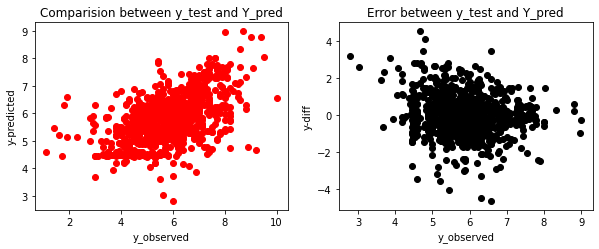

In [75]:
# Plot outputs
#x = Xtest_data.iloc[:, :0].values
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
plt.subplot(521)
plt.xlabel("y_observed")
plt.ylabel("y-predicted")
plt.scatter(y_test, y_pred, color='red')
plt.title("Comparision between y_test and Y_pred")

plt.subplot(522)
plt.scatter(y_pred, (y_test - y_pred), color='black')
plt.title("Error between y_test and Y_pred")
plt.xlabel("y_observed")
plt.ylabel("y-diff")
plt.show()


# Model Validation

# Lasso method

In [76]:
from sklearn import linear_model

Lreg = linear_model.Lasso(alpha=0.1)
Lreg.fit(Xtrain_data[0], y_train)
y_pred2 = Lreg.predict(Xtest_data[0])



print("Ridge intercept_:", reg.intercept_)
print("Ridge reg.coef_", reg.coef_)


MSE2 = mean_squared_error(y_test, y_pred2)
print("Ridge Mean Square Error:", "{:.2f}".format(MSE))

RMSE = math.sqrt(MSE2)
print("Ridge Root Mean Square Error:", "{:.2f}".format(RMSE))


print("Ridge R-Squared:", "{:.2f}".format(metrics.r2_score(y_test, y_pred2)))
#print(RMSE)

Ridge intercept_: [6.37550301]
Ridge reg.coef_ [[ 0.00487752 -0.19032632 -0.7505827  ...  0.23589214 -0.26596342
  -0.6014105 ]]
Ridge Mean Square Error: 1.14
Ridge Root Mean Square Error: 1.19
Ridge R-Squared: 0.12


# XGBoost Regressor

In [77]:
import xgboost as xgb
from xgboost import XGBRegressor

model3 = xgb.XGBRegressor()
model3.fit(Xtrain_data[0], y_train)
y_pred3 = model3.predict(Xtest_data[0])
#print(y_pred3)


#print("XGB intercept_:", model3.intercept_)
#print("Ridge reg.coef_", model3.coef_)


MSE3 = mean_squared_error(y_test, y_pred3)
print("XGB Mean Square Error:", "{:.2f}".format(MSE))

RMSE = math.sqrt(MSE3)
print("XGB Root Mean Square Error:", "{:.2f}".format(RMSE))


print("XGB R-Squared:", "{:.2f}".format(metrics.r2_score(y_test, y_pred3)))
#print(RMSE)

XGB Mean Square Error: 1.14
XGB Root Mean Square Error: 1.05
XGB R-Squared: 0.30


# Polynominal Regression


In [177]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Xtrain_data[0])
X_poly

<3996x74206653 sparse matrix of type '<class 'numpy.float64'>'
	with 263736 stored elements in Compressed Sparse Row format>

In [87]:
#Poly_reg = LinearRegression()
#Poly_reg.fit(X_poly,y)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

C:\Users\vishd\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:50:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ValueError: continuous is not supported